In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from phik import phik_matrix
from scipy.spatial.distance import squareform

In [60]:
#读取源数据
data = pd.read_excel("../DataSource/result.xlsx")
# 去除 'source ID' 列
data = data.drop('source ID', axis=1)
data_array = data.values

In [68]:
# 将DataFrame转换为NumPy数组
data_array = data.values

# 定义每个批次的大小
batch_size = 75

# 计算距离矩阵的维度
num_samples = data_array.shape[0]

# 初始化一个空的距离矩阵
distance_matrix = np.zeros((num_samples, num_samples))

# 分批计算距离矩阵
for i in range(0, num_samples, batch_size):
    start_idx = i
    end_idx = min(i + batch_size, num_samples)
    
    # 计算当前批次内样本之间的Jaccard距离
    batch_distance = pairwise_distances(data_array[start_idx:end_idx], metric='jaccard')
    
    # 将当前批次内的距离矩阵填充到整体距离矩阵中
    distance_matrix[start_idx:end_idx, start_idx:end_idx] = batch_distance

# 转换Jaccard距离为欧氏距离，以便与Ward链接法兼容
euclidean_distance = squareform(jaccard_distance)

# 将欧氏距离数组转换成2D数组
euclidean_distance = euclidean_distance.reshape(-1, 1)

# 使用Ward链接法进行聚类
n_clusters = 16
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(euclidean_distance)

C:\Users\Kerberos233\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\pairwise.py:2181: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Kerberos233\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\pairwise.py:2181: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Kerberos233\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


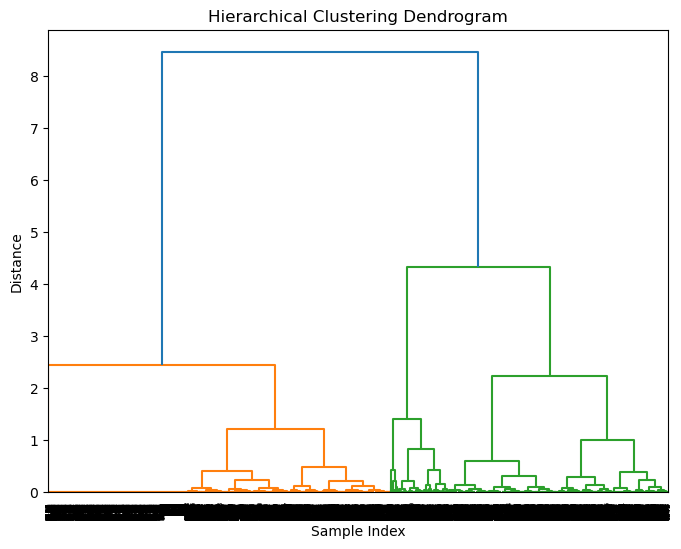

In [76]:
# 绘制聚类树状图（树状图）
plt.figure(figsize=(8, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()